In [161]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix

# Feature selection
from boruta import BorutaPy as bp
 
# Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [162]:
train_identity_data = pd.read_csv('kaggle_datasets/train_identity.csv')
train_transaction_data = pd.read_csv('kaggle_datasets/train_transaction.csv')

In [163]:
pd.set_option('display.max_columns', 500)
train_transaction_data.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [164]:
train_identity_data.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [165]:
# https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature
train_transaction_data['Transaction_dow'] = np.floor((train_transaction_data['TransactionDT'] / (3600 * 24) - 1) % 7)
train_transaction_data['Transaction_hour'] = np.floor(train_transaction_data['TransactionDT'] / 3600) % 24

In [166]:
na_columns = train_identity_data.isna().sum()
print(na_columns[na_columns==0])

TransactionID    0
id_01            0
id_12            0
dtype: int64


In [167]:
pd.set_option('display.max_rows', 500)
na_columns = train_transaction_data.isna().sum()
print(na_columns[na_columns==0])
print(na_columns[na_columns>0]/train_transaction_data.shape[0])

TransactionID       0
isFraud             0
TransactionDT       0
TransactionAmt      0
ProductCD           0
card1               0
C1                  0
C2                  0
C3                  0
C4                  0
C5                  0
C6                  0
C7                  0
C8                  0
C9                  0
C10                 0
C11                 0
C12                 0
C13                 0
C14                 0
Transaction_dow     0
Transaction_hour    0
dtype: int64
card2            0.015127
card3            0.002650
card4            0.002670
card5            0.007212
card6            0.002660
addr1            0.111264
addr2            0.111264
dist1            0.596524
dist2            0.936284
P_emaildomain    0.159949
R_emaildomain    0.767516
D1               0.002149
D2               0.475492
D3               0.445149
D4               0.286047
D5               0.524674
D6               0.876068
D7               0.934099
D8               0.873123
D9       

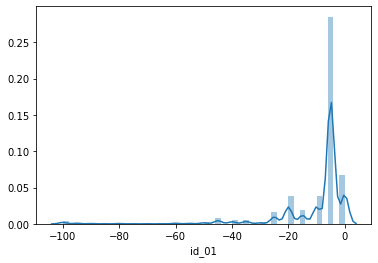

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train_identity_data['id_01'])

In [169]:
transaction_data_columns = train_transaction_data.columns
numericCols = train_transaction_data._get_numeric_data().columns
categoricalCols = list(set(transaction_data_columns) - set(numericCols))
print('The categorical columns in transaction data are: ',categoricalCols)

The categorical columns in transaction data are:  ['M9', 'M1', 'M5', 'M3', 'card4', 'M2', 'M6', 'M4', 'ProductCD', 'card6', 'P_emaildomain', 'R_emaildomain', 'M7', 'M8']


In [170]:
train_transaction_data[categoricalCols] = train_transaction_data[categoricalCols].replace({ np.nan:'missing'})
train_transaction_data[numericCols] = train_transaction_data[numericCols].replace({ np.nan:-1})

In [171]:
train_transaction_data.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,Transaction_dow,Transaction_hour
0,2987000,0,86400,68.5,W,13926,-1.0,150.0,discover,142.0,credit,315.0,87.0,19.0,-1.0,missing,missing,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,13.0,-1.0,-1.0,-1.0,0.0,T,T,T,M2,F,T,missing,missing,missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,-1.0,-1.0,gmail.com,missing,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,missing,missing,missing,M0,T,T,missing,missing

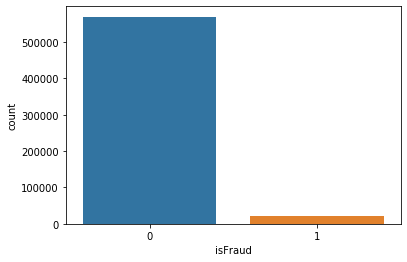

In [172]:
sns.countplot(train_transaction_data['isFraud'])

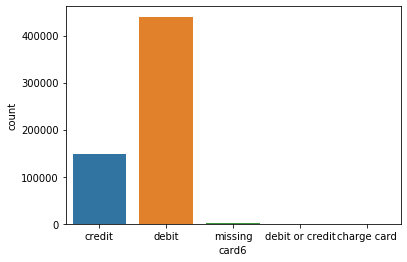

In [173]:
sns.countplot(train_transaction_data['card6'])

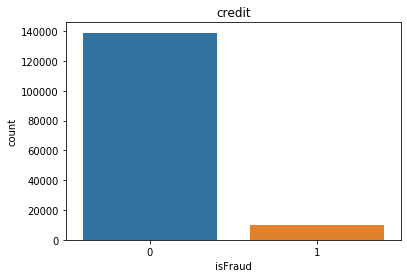

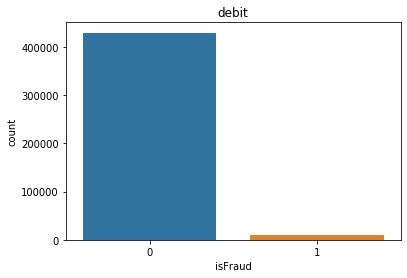

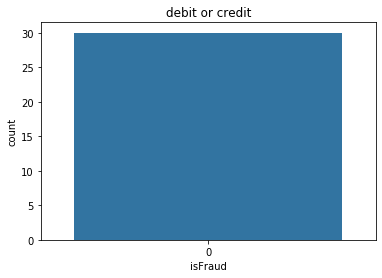

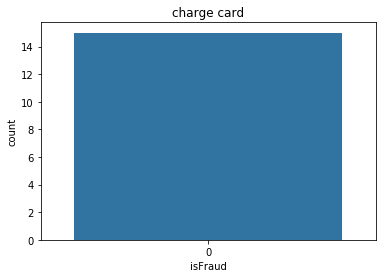

In [174]:
cardTypes = ['credit','debit','debit or credit','charge card']
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_transaction_data.loc[train_transaction_data["card6"]=="'+i_card+'"]')
    plt.figure(i)
    sns.countplot(cardData['isFraud']).set_title(i_card)

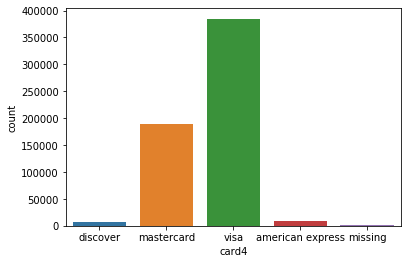

In [175]:
sns.countplot(train_transaction_data['card4'])

In [176]:
print('The average transaction amount for non fraudulent transactions is: ', 
      np.mean(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The average transaction amount for fraudulent transactions is: ', 
      np.mean(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The average transaction amount for non fraudulent transactions is:  134.51166457849672
The average transaction amount for fraudulent transactions is:  149.24477858974976


In [177]:
print('The Maximum transaction amount for non fraudulent transactions is: ', 
      np.max(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The Maximum transaction amount for fraudulent transactions is: ', 
      np.max(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The Maximum transaction amount for non fraudulent transactions is:  31937.391
The Maximum transaction amount for fraudulent transactions is:  5191.0


In [178]:
print('The Minimum transaction amount for non fraudulent transactions is: ', 
      np.min(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The Minimum transaction amount for fraudulent transactions is: ', 
      np.min(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The Minimum transaction amount for non fraudulent transactions is:  0.251
The Minimum transaction amount for fraudulent transactions is:  0.292


In [179]:
maxCardData = {}
minCardData = {}
meanCardData = {}
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_transaction_data.loc[train_transaction_data["card4"]=="'+i_card+'"]')
    maxCardData[i_card] = np.max(cardData['TransactionAmt'])
    minCardData[i_card] = np.min(cardData['TransactionAmt'])
    meanCardData[i_card] = np.mean(cardData['TransactionAmt'])

In [180]:
print('The maximum transactions by card are:', maxCardData)
print('The minimum transactions by card are:', minCardData)
print('The average transactions by card are:', meanCardData)

The maximum transactions by card are: {'credit': nan, 'debit': nan, 'debit or credit': nan, 'charge card': nan}
The minimum transactions by card are: {'credit': nan, 'debit': nan, 'debit or credit': nan, 'charge card': nan}
The average transactions by card are: {'credit': nan, 'debit': nan, 'debit or credit': nan, 'charge card': nan}


In [181]:
normalDataTransaction = train_transaction_data.loc[train_transaction_data["isFraud"]==0]
normalDataTransaction.TransactionAmt.describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

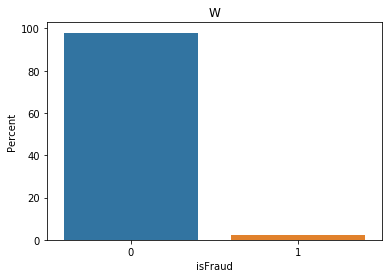

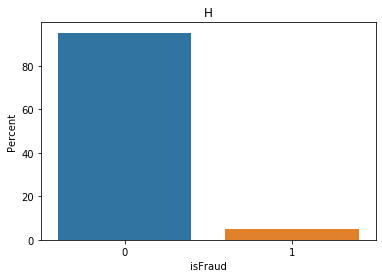

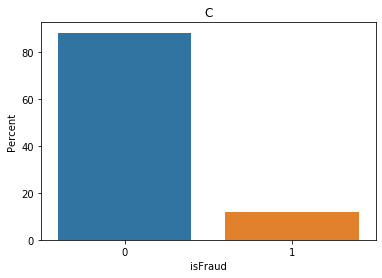

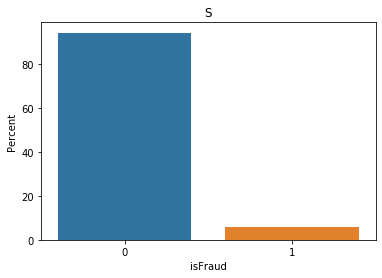

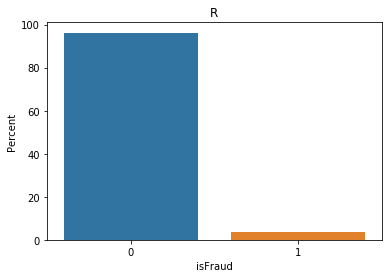

In [182]:
prodTypes = train_transaction_data['ProductCD'].unique()
for i,i_prod in enumerate(prodTypes):
    productData = eval('train_transaction_data.loc[train_transaction_data["ProductCD"]=="'+i_prod+'"]')
    plt.figure(i)
    ax = sns.barplot(x="isFraud", y="isFraud", data=productData, estimator=lambda x: len(x) / len(productData) * 100)
    ax.set(ylabel="Percent")
    ax.set_title(i_prod)

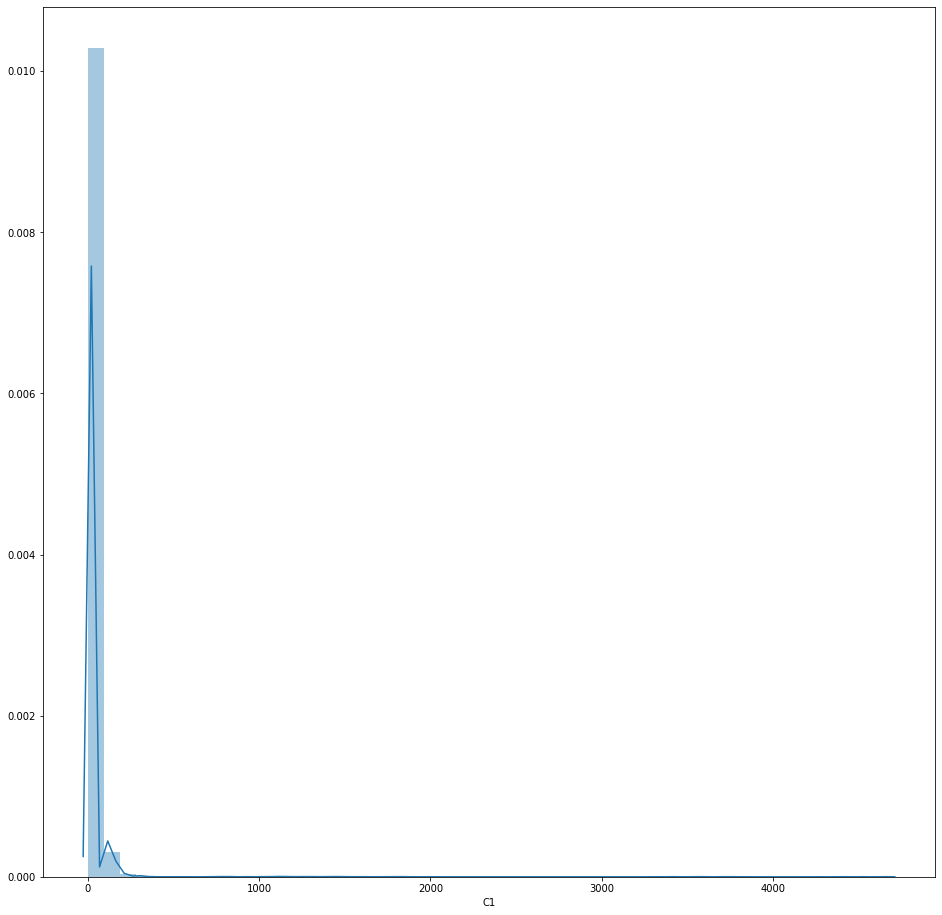

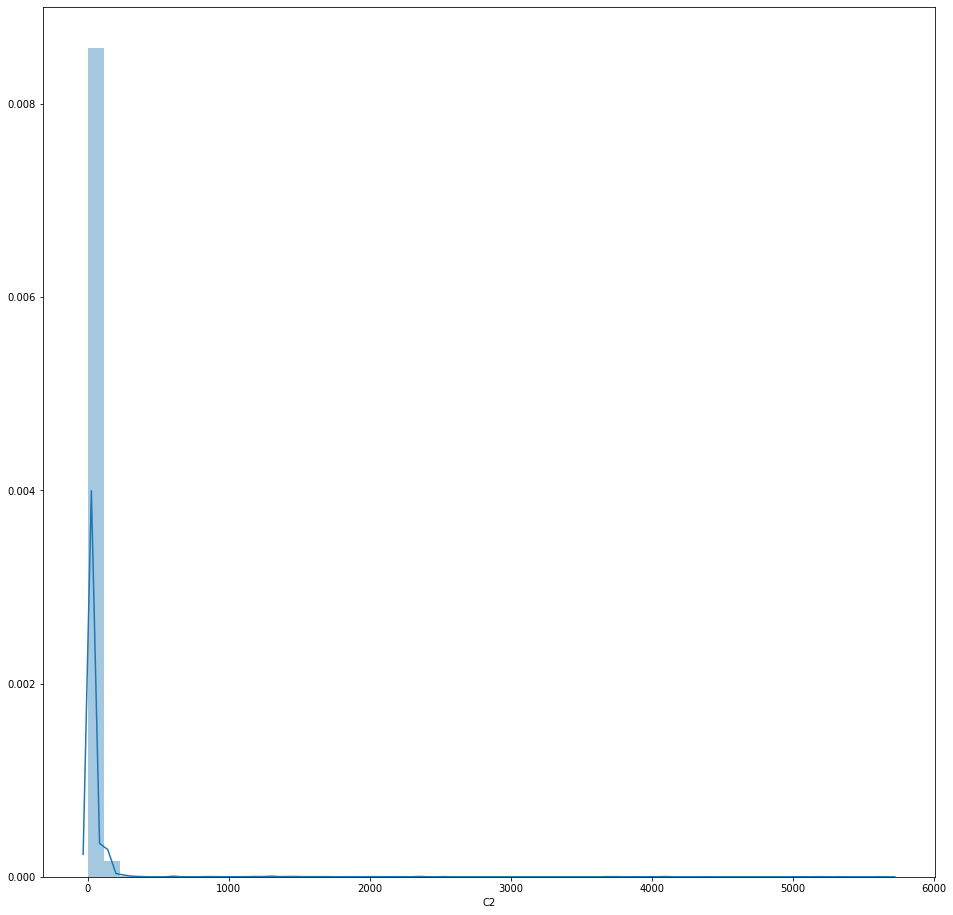

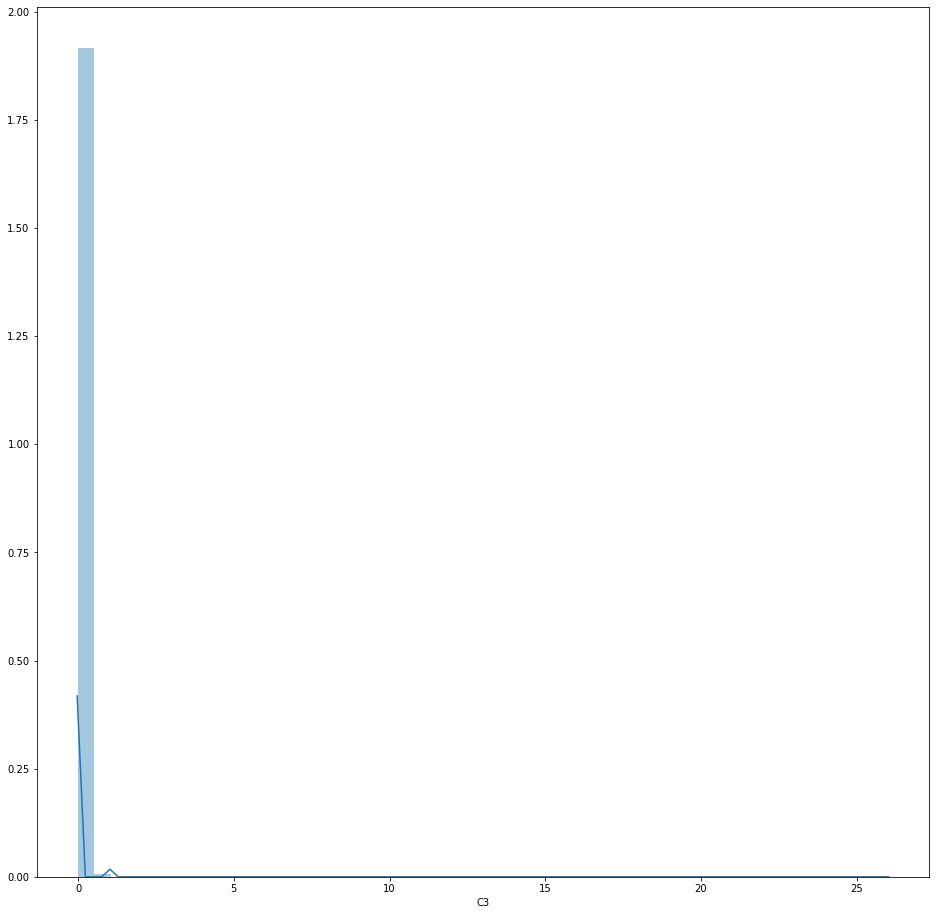

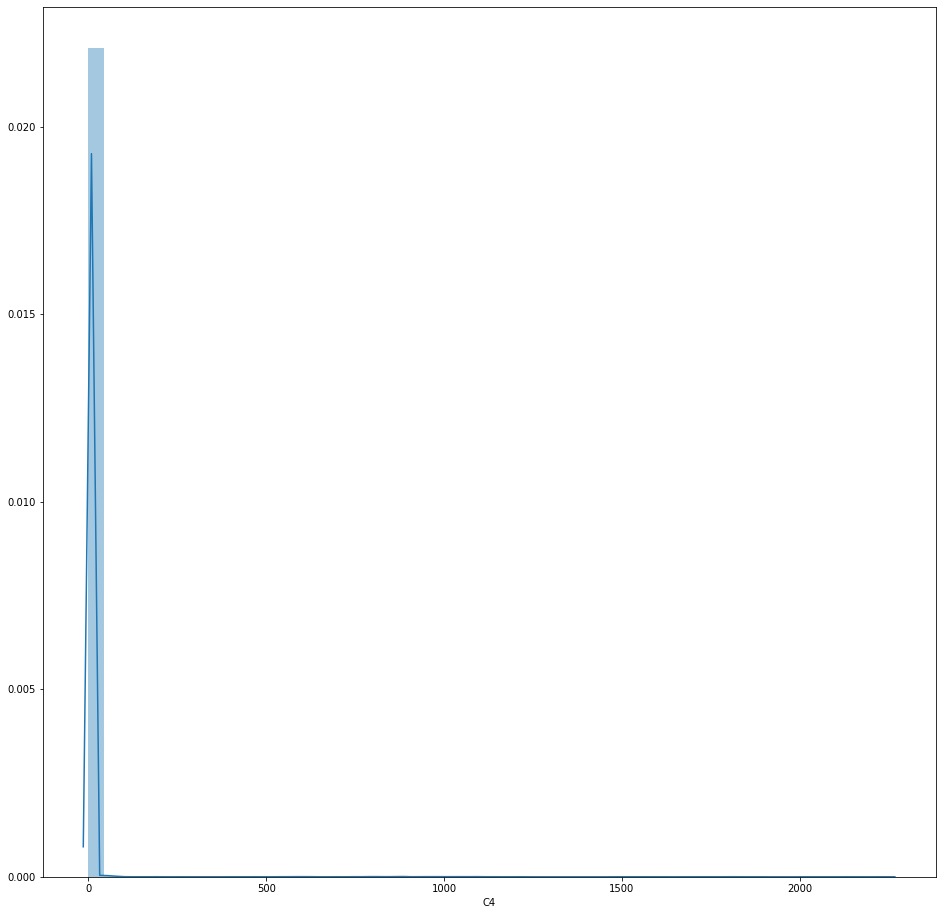

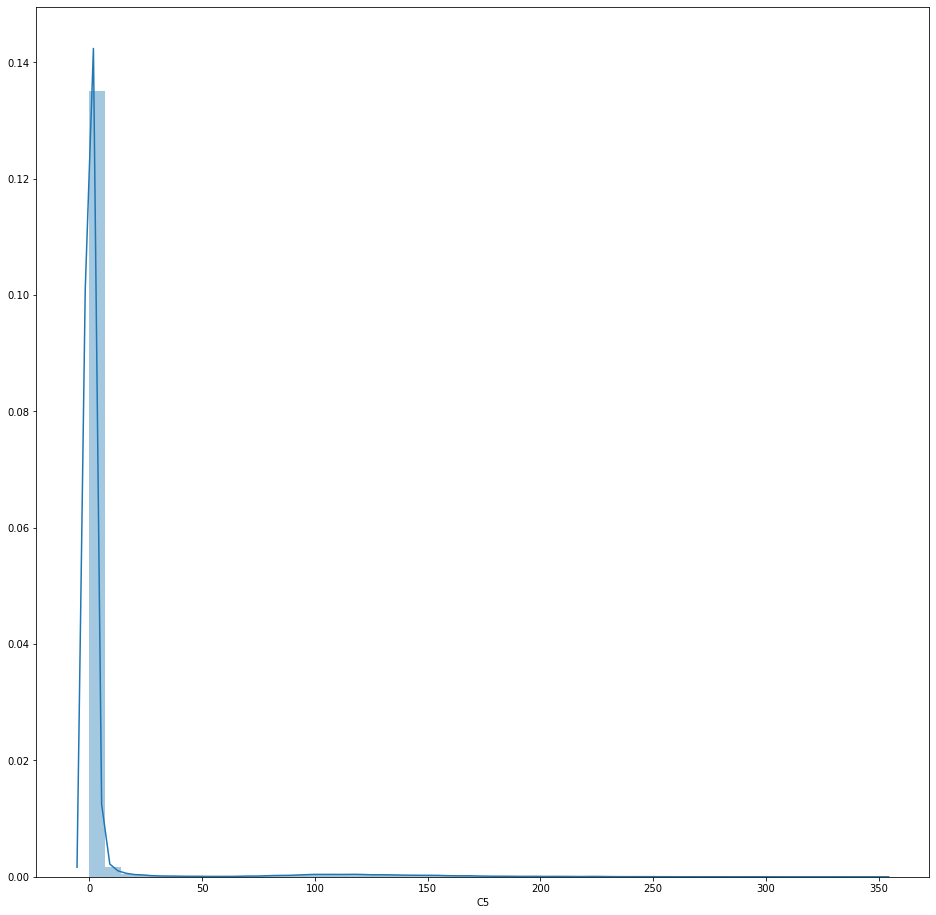

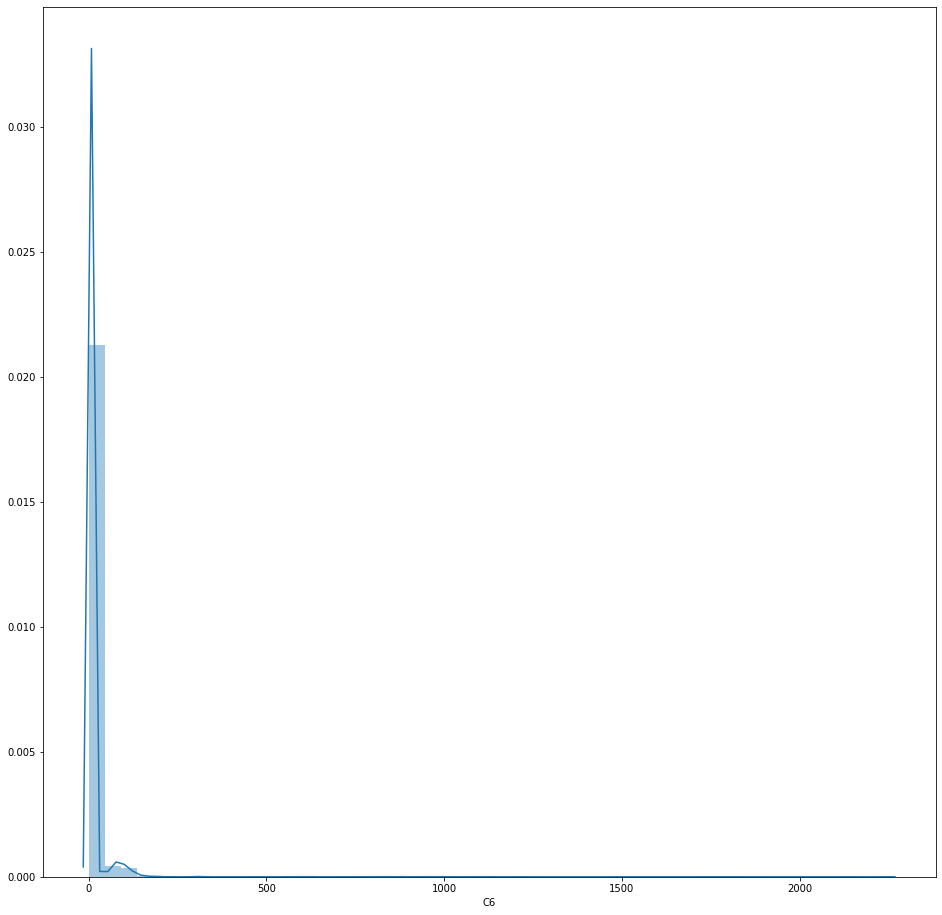

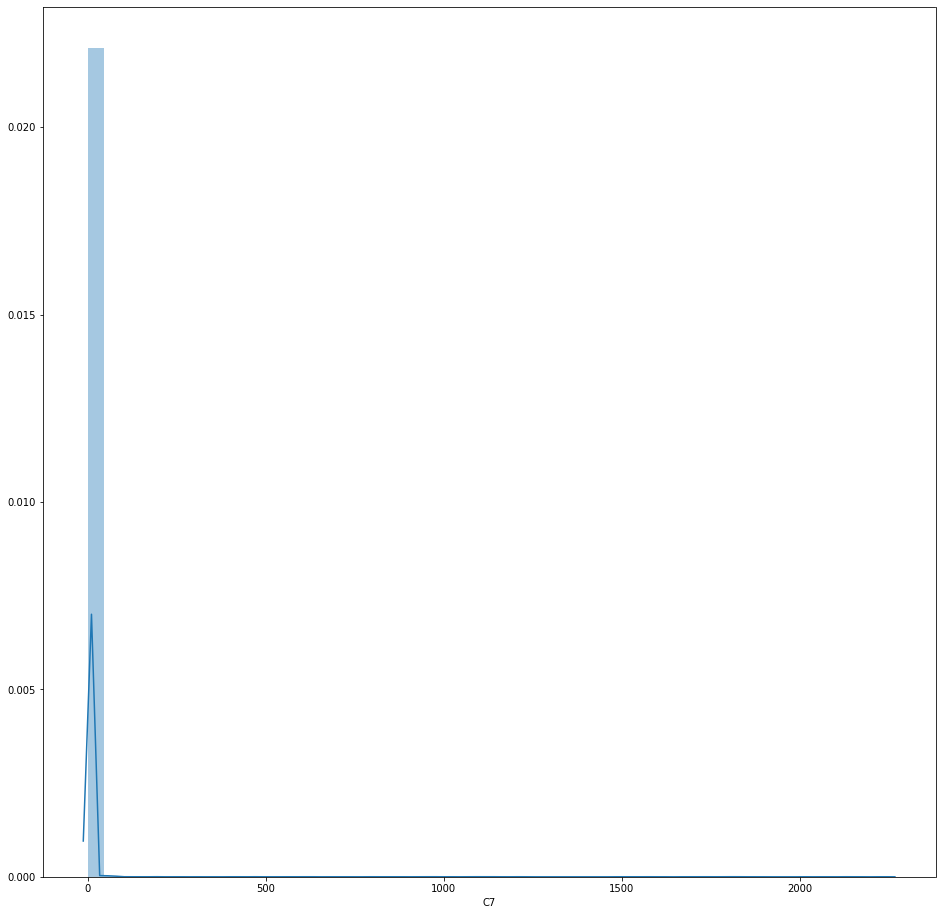

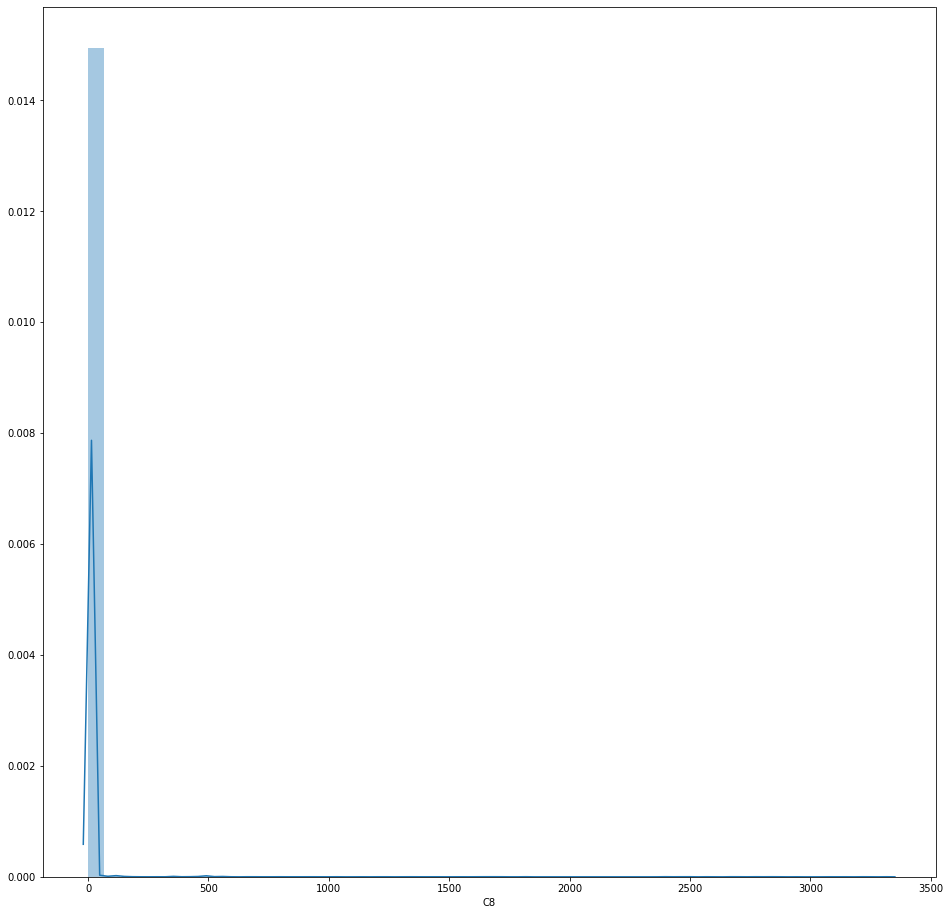

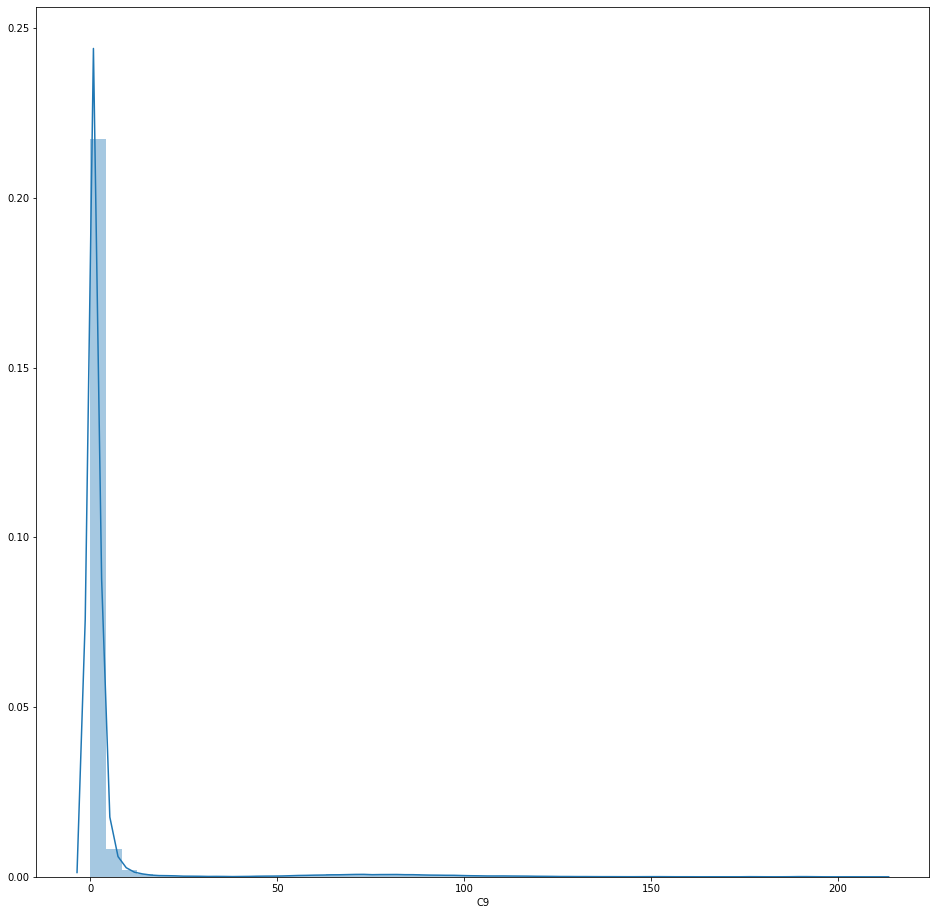

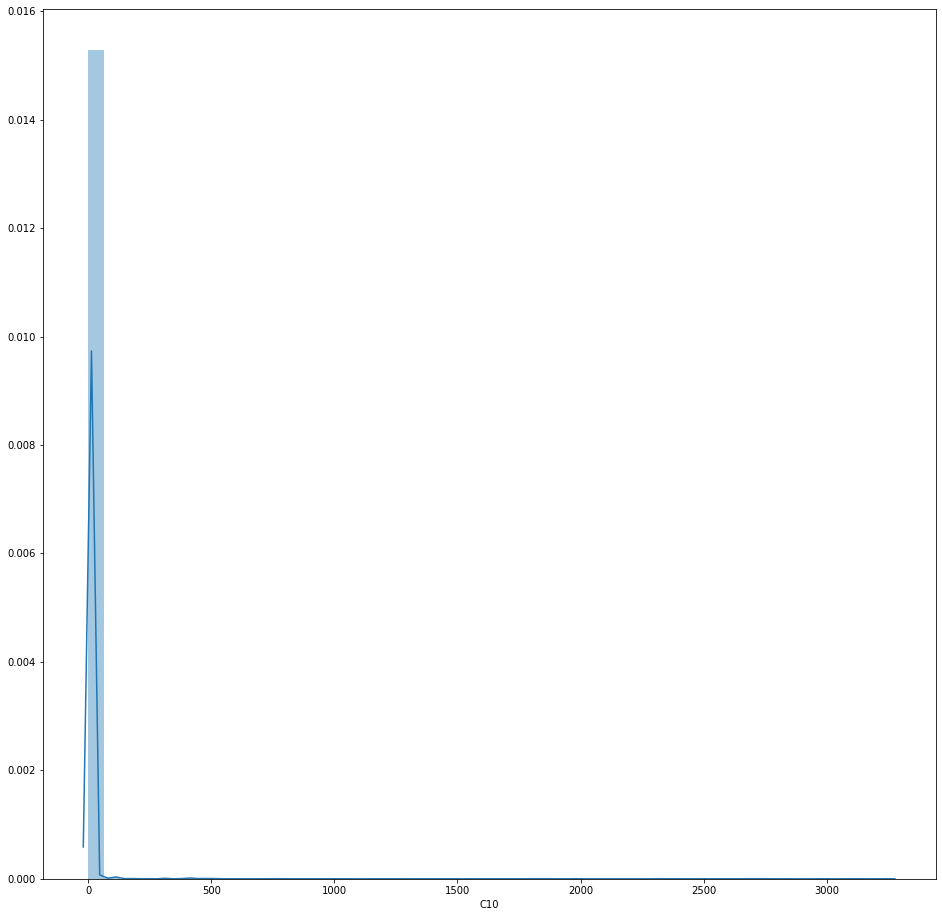

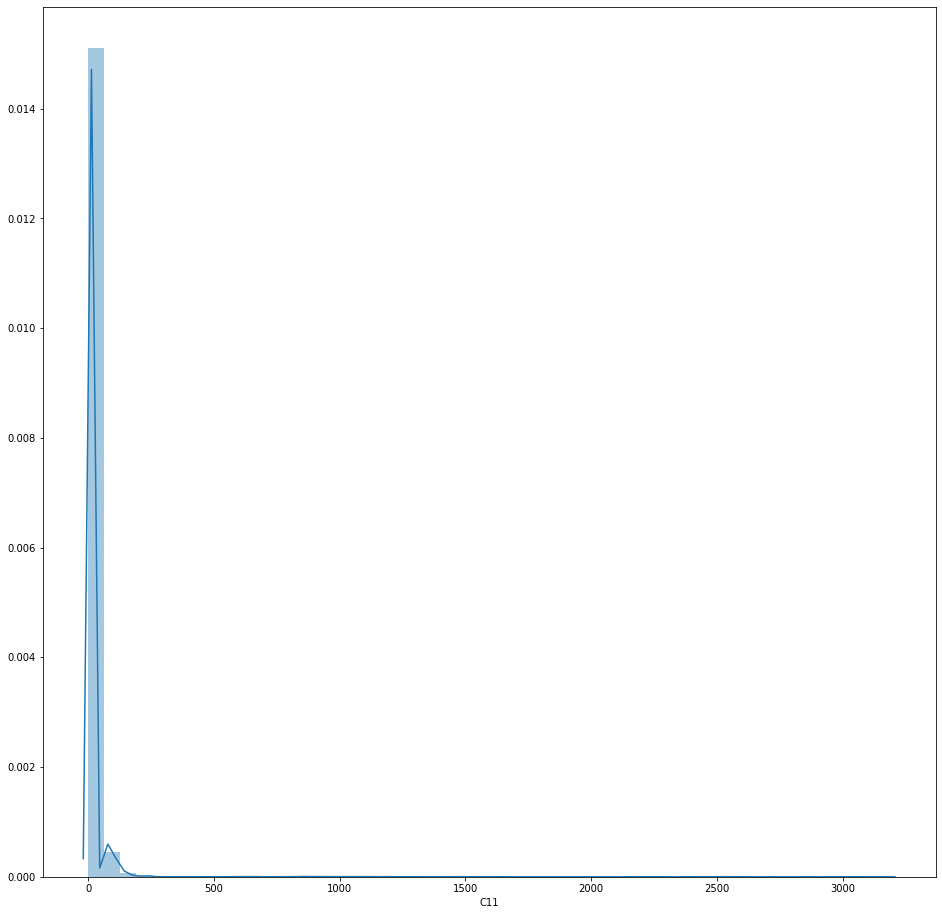

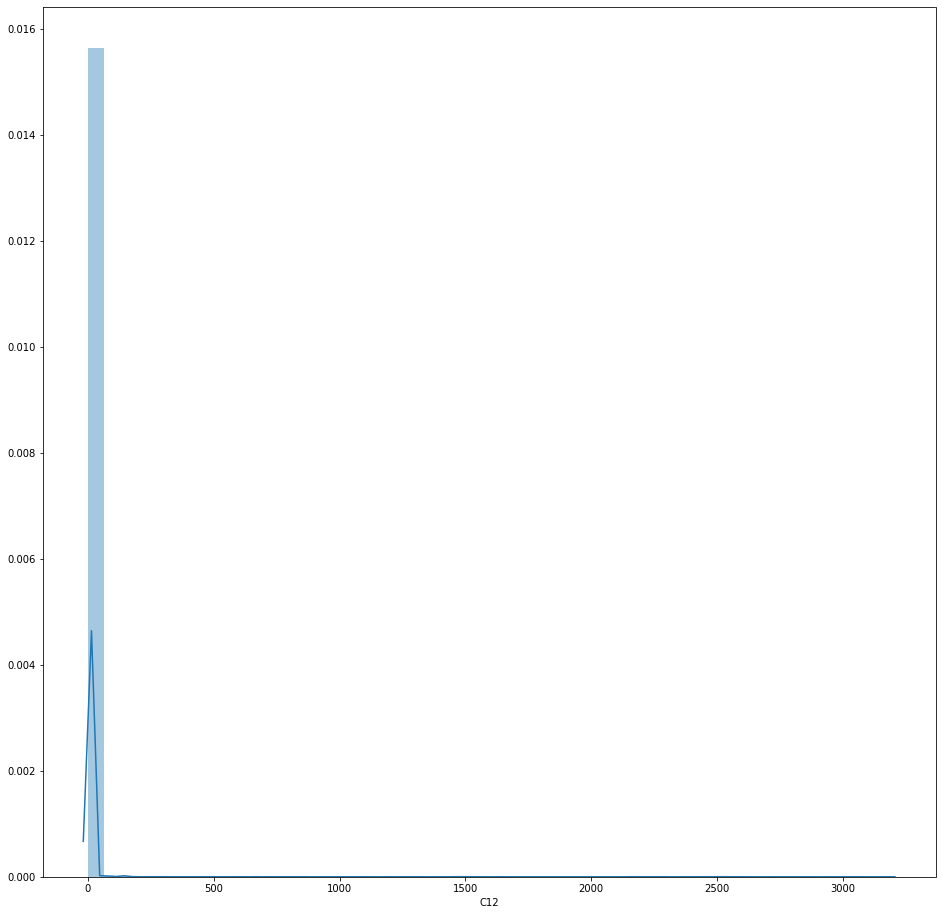

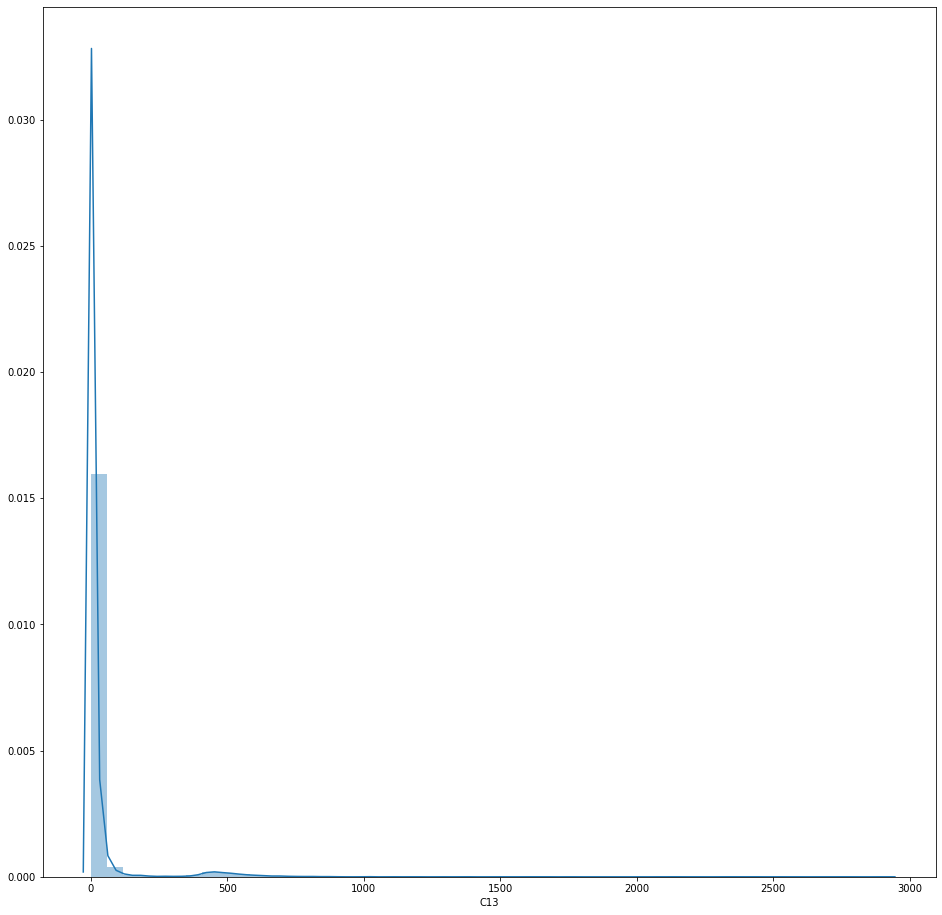

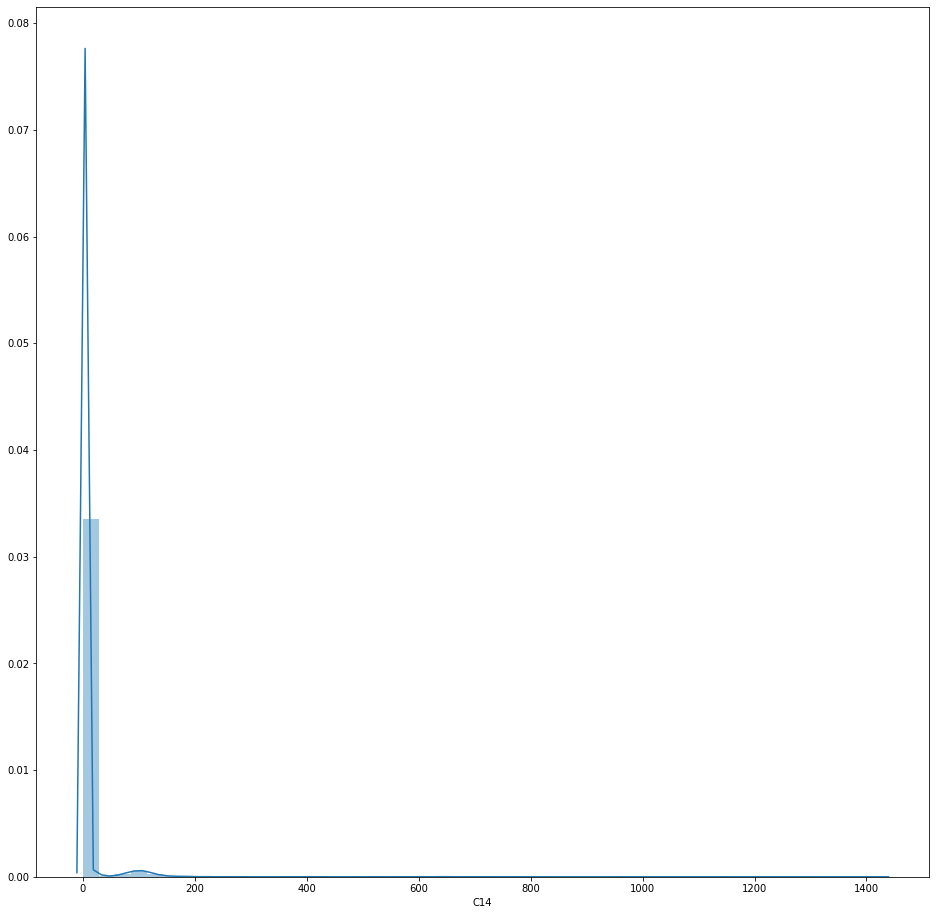

In [183]:
for i in range(1,15):    
    plt.figure(figsize=(16, 16))
    sns.distplot(eval('train_transaction_data["C'+str(i)+'"]'))
    ax.set(ylabel="Distribution")
    ax.set_title(['C'+str(i)])

In [184]:
print(train_identity_data.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [185]:
identity_data_columns = train_identity_data.columns
numericCols = train_identity_data._get_numeric_data().columns
categoricalCols = list(set(identity_data_columns) - set(numericCols))
print('The categorical columns in identity data are: ',categoricalCols)
train_identity_data[categoricalCols] = train_identity_data[categoricalCols].replace({ np.nan:'missing'})
train_identity_data[numericCols] = train_identity_data[numericCols].replace({ np.nan:-1})

The categorical columns in identity data are:  ['DeviceType', 'DeviceInfo', 'id_27', 'id_29', 'id_36', 'id_28', 'id_30', 'id_38', 'id_23', 'id_31', 'id_34', 'id_12', 'id_33', 'id_37', 'id_16', 'id_35', 'id_15']


In [186]:
np.unique(train_identity_data['id_30'])

array(['Android', 'Android 4.4.2', 'Android 5.0', 'Android 5.0.2',
       'Android 5.1.1', 'Android 6.0', 'Android 6.0.1', 'Android 7.0',
       'Android 7.1.1', 'Android 7.1.2', 'Android 8.0.0', 'Android 8.1.0',
       'Linux', 'Mac', 'Mac OS X 10.10', 'Mac OS X 10.11',
       'Mac OS X 10.12', 'Mac OS X 10.13', 'Mac OS X 10.6',
       'Mac OS X 10.9', 'Mac OS X 10_10_5', 'Mac OS X 10_11_3',
       'Mac OS X 10_11_4', 'Mac OS X 10_11_5', 'Mac OS X 10_11_6',
       'Mac OS X 10_12', 'Mac OS X 10_12_1', 'Mac OS X 10_12_2',
       'Mac OS X 10_12_3', 'Mac OS X 10_12_4', 'Mac OS X 10_12_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'Mac OS X 10_13_2',
       'Mac OS X 10_13_3', 'Mac OS X 10_13_4', 'Mac OS X 10_13_5',
       'Mac OS X 10_6_8', 'Mac OS X 10_7_5', 'Mac OS X 10_8_5',
       'Mac OS X 10_9_5', 'Windows', 'Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Vista', 'Windows XP', 'func',
       'iOS', 'iOS 10.0.2', 'iOS 10.1.1', 'iOS 10.2.0', 'iOS 10.2.1',

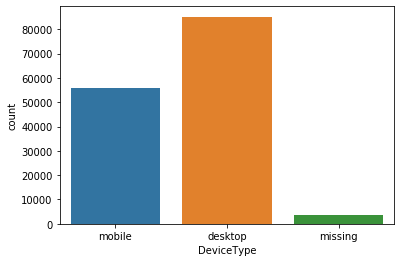

In [187]:
sns.countplot(train_identity_data['DeviceType'])

In [188]:
# Combining both datasets
df_dataset = train_transaction_data.merge(train_identity_data, how='outer', on='TransactionID')
print(train_transaction_data.shape)
print(df_dataset.shape)

(590540, 396)
(590540, 436)


In [189]:
df_dataset.sample(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,Transaction_dow,Transaction_hour,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
169431,3156431,0,3632485,25.950,W,5254,414.0,143.0,visa,226.0,debit,502.0,87.0,-1.0,-1.0,gmail.com,missing,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.000,-1.000,1.0,-1.0,-1.0,-1.0,-1.0,1.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.950001,25.950001,25.950001,25.950001,25.950001,25.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.950001,25.950001,25.950001,25.950001,25.950001,

In [190]:
#print total number of NANs in the dataset
print('Total Number of NANs = ', df_dataset.isnull().sum().sum())

Total Number of NANs =  17852280


In [191]:
# In all the numerical fields we can see the data does not surpase -600 so we can patch NAN with -999
df_dataset.fillna(value=-999, inplace=True)

In [192]:
print('Total Number of NANs = ', df_dataset.isnull().sum().sum())

Total Number of NANs =  0


In [193]:
print(f'Total number of Transactions {df_dataset.shape[0]}')
print(f'Total Number of Fraudulent Transactions {df_dataset["isFraud"].values.sum()}')
print(f'Just {(df_dataset["isFraud"].values.sum()/df_dataset.shape[0])*100:0.3f}% of the transactions are Fraudulent')

Total number of Transactions 590540
Total Number of Fraudulent Transactions 20663
Just 3.499% of the transactions are Fraudulent


Only 3.5 percent of transactions are Fraudulent due to an imbalanced dataset. So lets balance out the dataset

In [194]:
# Separate the target column, isFraud
y = df_dataset['isFraud']
# Drop the isFraud column from the dataset df
X = df_dataset.drop(labels='isFraud', axis=1)

print(y.shape, X.shape)
display(y.sample(5))
display(X.sample(5))

(590540,) (590540, 435)


328111    0
512437    0
285751    0
498470    0
411769    0
Name: isFraud, dtype: int64

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,Transaction_dow,Transaction_hour,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
176372,3163372,3816569,57.95,W,11465,360.0,150.0,visa,166.0,debit,123.0,87.0,6.0,-1.0,gmail.com,missing,2.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,11.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,T,T,T,missing,missing,F,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,4.0,-999

In [195]:
# Clear RAM 
df_dataset = None

In [196]:
# Now that we have separated the target variable
# Time to undersample 
rus = RandomUnderSampler(random_state=786)
X_rus, y_rus = rus.fit_resample(X, y)

# Check
print(X_rus.shape, y_rus.shape)

(41326, 435) (41326,)


In [197]:
# Check Dataset Balance 
print(f'Total number of Transactions {X_rus.shape[0]}')
print(f'Total Number of Fraudulent Transactions {y_rus.sum()}')
print(f'Exactly {(y_rus.sum()/X_rus.shape[0])*100:0.3f}% of the transactions are Fraudulent')

Total number of Transactions 41326
Total Number of Fraudulent Transactions 20663
Exactly 50.000% of the transactions are Fraudulent


In [198]:
# Extract numerical columns 
num_col_list = X.select_dtypes([np.number]).columns
display(num_col_list)

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=404)

In [199]:
# X_rus is a numpy array 
# Recreate the undersampled dataframe 

df_X_rus = pd.DataFrame(data=X_rus,    # values
              index=X_rus[:,0],    # 1st column as index
              columns=X.columns.values)  # 1st row as the column names

df_X_rus.shape

(41326, 435)

In [ ]:
df_X_rus_boruta = df_X_rus.copy()
df_X_rus.sample(10)

In [201]:
# Drop all columns from df_X_rus except for the numerical ones 
df_X_rus = df_X_rus[num_col_list]
# Convert all columns to numeric type (they are 'object' by default)
df_X_rus = df_X_rus.apply(pd.to_numeric) 
# Check
df_X_rus.shape

(41326, 404)

## Boruta Algorithm
Helps with feature extraction which is good for feature engineering

In [202]:
# Boruta uses RandomnForestClassifier/LGBM/XGBOOST
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1,\
                             class_weight='balanced', max_depth=3)
boruta_selector = bp(rfc, n_estimators='auto', verbose=2)

In [ ]:
# Start Feature Selection 
boruta_selector.fit(df_X_rus.values, y_rus)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	404
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	280
Tentative: 	124
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	280
Tentative: 	105
Rejected: 	19
Iteration: 	10 / 100
Confirmed: 	280
Tentative: 	105
Rejected: 	19
Iteration: 	11 / 100
Confirmed: 	280
Tentative: 	105
Rejected: 	19
Iteration: 	12 / 100
Confirmed: 	307
Tentative: 	78
Rejected: 	19
Iteration: 	13 / 100
Confirmed: 	307
Tentative: 	78
Rejected: 	19
Iteration: 	14 / 100
Confirmed: 	307
Tentative: 	78
Rejected: 	19
Iteration: 	15 / 100
Confirmed: 	307
Tentative: 	72
Rejected: 	25
Iteration: 	16 / 100
Confirmed

In [ ]:
print('==============BORUTA==============')
print(boruta_selector.n_features_)
print(boruta_selector.support_)

In [ ]:
# Boruta says only 342 features are relevant 
# Extract the relevant features in a list 
selected_features = [num_col_list[i] for i, feature in \
                     enumerate(boruta_selector.support_) if feature]
print(len(selected_features))
print(selected_features)

In [ ]:
# Irrelevant Features 
print(set(num_col_list) - set(selected_features))

In [ ]:
# Keep only the 'selected_features' in the Dataframe 
df_final_dataset = df_X_rus[selected_features]

df_final_dataset.shape

In [ ]:
def dataset_split(df_X_dataset, np_Y_dataset, test_size):
  """
  Splits the df_dataset dataframe according to test_size.

  Parameters
  ----------
  df_X_dataset : Pandas Dataframe    
    Dataframe containing features that is going to be split.
  np_Y_dataset : Numpy 1D Array    
    Target array that is going to be split.
  test_size : Float
    A value > 0 and < , that specifies the size 
    of the testing set. 

  Returns
  -------
  X_train, X_test, y_train, y_test : np.array
    Numpy arrays of training and testing sets. 
  """
  # Ensure data sanity
  assert 0 < test_size < 1, 'Value of test_size should be between 0 & 1.'

  X = df_X_dataset
  Y = np_Y_dataset

  # Split the data for the train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)

  return X_train, X_test, y_train, y_test

In [ ]:
# Split the dataset with 15% reserved for Testing
X_train, X_test, y_train, y_test = dataset_split(df_final_dataset, y_rus,\
                                                 test_size=0.15)
# Check - Train and Test shapes should match
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Logistic Regression Train & Predict on Training Set

In [ ]:
# Train 
clf = LogisticRegression(random_state=666, solver='lbfgs',\
                         multi_class='ovr', verbose=1, n_jobs=-1)\
                         .fit(X_train, y_train)

In [ ]:
# Predict 
y_pred = clf.predict(X_test)

In [ ]:
# Calculate confusion matrix 
confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Get the classification report 
print(classification_report_imbalanced(y_true=y_test, y_pred=y_pred,target_names=['Not Fraud', 'Fraud']))